# (Almost) all the activation functions, illustrated

By Rob Leckenby

Some activation functions are listed below, then a function to plot them all with their derivatives.

Credit to [DISHASHREE GUPTA](https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/) for the list of functions.

In [1]:
import numpy as np

def binary_step(z, *, derivative=False):
    if derivative:
        return np.where(z != 0, 0, np.inf)
    return np.where(z < 0, 0, 1)
    
def linear(z, *, alpha=1, derivative=False):
    if derivative:
        return np.ones_like(z) * alpha
    return alpha * z

def sigmoid(z, *, derivative=False):
    if derivative:
        return sigmoid(z) * (1 - sigmoid(z))
    return 1 / (1 + np.exp(-z))

def tanh(z, *, derivative=False):
    if derivative:
        return 1 - np.power(tanh(z), 2)
    return (2 / (1 + np.exp(-2*z))) -1

def relu(z, *, derivative=False):
    """Rectified Linear Unit (ReLU) (Hahnloser et al., 2000; Jarrett et al., 2009; Nair & Hinton, 2010).
    Special case of LReLU, below."""
    if derivative:
        return 1 * (z > 0)
    return z * (z > 0)

def leaky_relu(z, *, alpha=0.01, derivative=False):
    """Leaky ReLU (LReLU). (Maas et al., 2013). The ReLU is a special case where alpha = 0."""
    if derivative:
        return alpha * (z <= 0) + (z > 0)
    return np.maximum(alpha * z, z) 

def elu(z, *, alpha=1, derivative=False):
    """Exponential Linear Unit (ELU) (Clevert et al., 2015)."""
    if derivative:
        return np.where(z < 0, alpha * np.exp(z), 1)
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

def swish(z, *, derivative=False):
    """SWISH: A SELF-GATED ACTIVATION FUNCTION https://arxiv.org/pdf/1710.05941v1.pdf
    We have to define it non-recursively because... not sure why but the plotting
    code below gets into an infinite loop otherwise. Special case of E-Swish, below."""
    if derivative:
        return z * sigmoid(z) + sigmoid(z) * (1 -z * sigmoid(z))
    return z * sigmoid(z)

def eswish(z, *, beta=1, derivative=False):
    """Eswish https://arxiv.org/abs/1801.07145
    Eswish is a generalization of Swish, multiplied by a parameter beta.
    We have to define it non-recursively because... not sure why but the plotting
    code below gets into an infinite loop otherwise. Swish is a special case where
    beta = 1."""
    if derivative:
        return beta * z * sigmoid(z) + sigmoid(z) * (beta - beta * z * sigmoid(z))
    return beta * z * sigmoid(z)

All of these functions are called in a similar way:

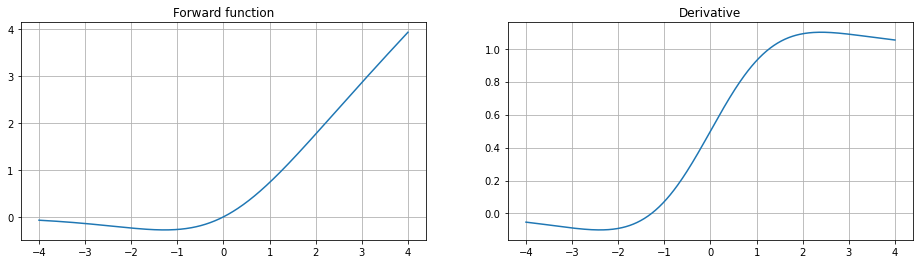

In [2]:
import matplotlib.pyplot as plt

z = np.linspace(-4, 4, 400)
a = swish(z)
a_ = swish(z, derivative=True)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 4))
ax0.plot(z, a)
ax0.grid()
ax0.set_title('Forward function')
ax1.plot(z, a_)
ax1.grid()
ax1.set_title('Derivative')

plt.show()

Note that when we implement activation functions in production code, we usually want to implement the derivative in terms of $f(z)$, because that's what we'll be computing the gradient from (i.e. the activations).

## Plot all the functions

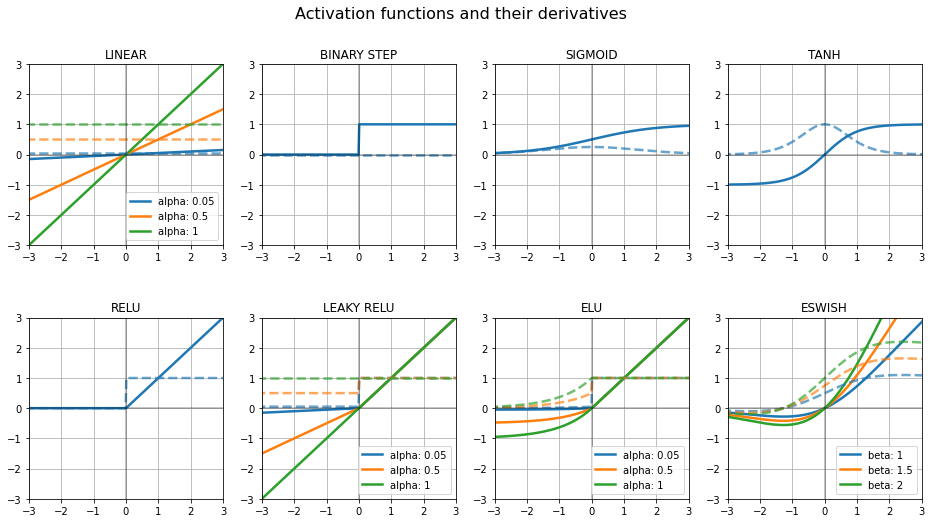

In [3]:
from cycler import cycler

def plot_all_activation_functions():
    """
    Plot all functions with dervative; vary the numeric parameter.
    """
    x = np.linspace(-4, 4, 400)
    functions = [linear, binary_step, sigmoid, tanh, relu, leaky_relu, elu, eswish]

    cyc3 = cycler(color=[u'#1f77b4', u'#ff7f0e', u'#2ca02c'])
    props_deriv = {'lw': 2.5, 'ls': '--', 'alpha': 0.67}
    props_forward = {'lw': 2.5, 'ls': '-', 'alpha': 1.0}
    props_hvlines = {'c': 'k', 'lw': 1.5, 'alpha': 0.3}
    
    fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
    fig.suptitle('Activation functions and their derivatives', size=16)
    
    for f, ax in zip(functions, axs.flat):
        ax.set_title(f.__name__.upper().replace('_', ' '))
        
        for d in (False, True):  # Forward and backward functions.
            props = props_deriv if d else props_forward
            if len(kwargs := f.__kwdefaults__) == 1:
                ax.set_prop_cycle(cycler(color=[u'#1f77b4']))
                y = f(x, derivative=d)
                ax.plot(x, y, label=None, **props)
            else:
                arg, _ = kwargs.keys()
                vals = [1, 1.5, 2] if f is eswish else [0.05, 0.5, 1]
                ax.set_prop_cycle(cyc3)
                for v in vals:
                    kwargs.update({arg: v, 'derivative': d})
                    y = f(x, **kwargs)
                    label = f"{arg}: {v}" if not d else None
                    ax.plot(x, y, label=label, **props)
                ax.legend(loc=4)
            
        ax.grid()
        ax.axhline(0, -3, 3, **props_hvlines)
        ax.axvline(0, -3, 3, **props_hvlines)
        ax.set_xlim(-3, 3); ax.set_ylim(-3, 3)            
            
        plt.subplots_adjust(hspace=0.4)
            
    return fig

_ = plot_all_activation_functions()

---

&copy; Agile Scientific 2021, licenced CC BY